
# Project: Investigate a Dataset - [TMDb Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It has 10866 rows and 21 columns and I'll be investigating these to find answers to the questions below.

### Question(s) for Analysis
>Which movie release had the highest and lowest profit?

>What year was the most profit made from movie releases?

>Is there a correlation between profit and budget?

>What genre has the most count?
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


In [2]:
#Loading the TMDb dataset and confirming the shape of the dataset.
df = pd.read_csv("tmdb-movies.csv")
df.shape

(10866, 21)

In [110]:
#Viewing the first five rows of the data.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df["profit"] = df["revenue"] - df["budget"]

One of the questions to be analysed is about the maximum amd minimum profit made, so I added a new column in which the budget is deducted from the revenue.


In [113]:
#Summary statistics of the dataset.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07,2.519762e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08,9.658799e+07
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07,9.083358e+06
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


This is a summary statistic of the dataset, telling us information like the mean,standard deviation and different quartiles of the columns.

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 22 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

This shows the number of rows, columns and total number of entries per column. As we can see here, some columns have less entries than others and this shows presence of null or missing values.

In [115]:
#Checking the total number of null values in the dataset.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
profit                     0
dtype: int64

In [4]:
#Dropping the null values.
df.dropna(inplace = True)

In [122]:
#Checking for duplicates in the dataset.
sum(df.duplicated())

0

In [5]:
df.drop(columns=['imdb_id','homepage','tagline','keywords','overview','runtime','production_companies','release_date','vote_count','vote_average','budget_adj','revenue_adj'], inplace = True)
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,genres,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015,1363528810


Since I will not be making use of these columns and they are not tantamount to my analysis as well, I have chosen to drop them.

In [98]:
#Confirming that the columns have been dropped and the null values removed.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 10 columns):
id                1992 non-null int64
popularity        1992 non-null float64
budget            1992 non-null int64
revenue           1992 non-null int64
original_title    1992 non-null object
cast              1992 non-null object
director          1992 non-null object
genres            1992 non-null object
release_year      1992 non-null int64
profit            1992 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 171.2+ KB


As seen here, I finally have the columns I'll be working with and there are all non-null values.

In [6]:
df = df[df['budget'] != 0]
df = df[df['revenue'] != 0]

Here, I updated the dataframe to only include values in the budget and revenue columns that are not equal to zero.

## Exploratory Data Analysis

### Question 1:
Which movie release had the highest and lowest profit?

In [131]:
def min_max(col):
    for i in col:
        #The lowest value in the column.
        col_min = df[col].min()
        #The highest value in the column.
        col_max = df[col].max()
        #The index of the lowest value in the column.
        id_min = df[col].idxmin()
        #The index of the highest value in the column.
        id_max = df[col].idxmax()
        #Subsetting the movie titles with the ID numbers.
        data_min = df['original_title'][id_min]
        data_max = df['original_title'][id_max]
    print("The lowest {} realized from a movie is {} for {}.".format(col, col_min, data_min))
    print("The highest {} realized from a movie is {} for {}.".format(col, col_max, data_max))
    
min_max("profit")

The lowest profit realized from a movie is -413912431 for The Warrior's Way.
The highest profit realized from a movie is 2544505847 for Avatar.


As shown here, the movie with the least profit is "The Warrior's Way" making '$413,912,431' in deficit because it generated less revenue than its budget.

In a different light, Avatar made the most profit grossing over '$2.5B' in profit.

### Question 2:
What year was the most profit made from movie releases?

,profit
release_year,
1977,4.679183e+08
1997,3.441507e+08
1973,2.940420e+08
1980,2.703892e+08
1982,2.636540e+08


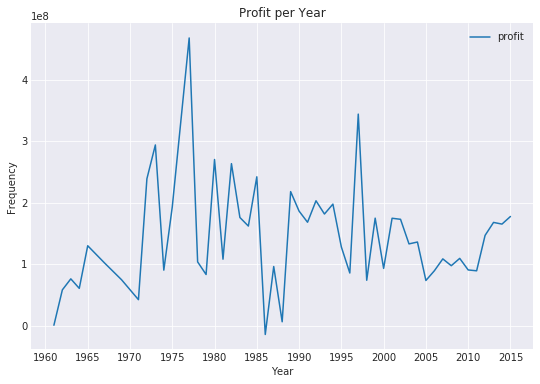

In [130]:
profit_mean = df.groupby("release_year")[["profit"]].mean()
profit_mean.plot(figsize = (9,6), xticks = np.arange(1960, 2016, 5), title="Profit per Year")
plt.xlabel("Year")
plt.ylabel("Frequency")

sorted_data = profit_mean.sort_values("profit", ascending=False)
sorted_data.head()


The table above is sorted in descending order to show the average profit made per year, with the year that made the most being at the top of the table. The visualization below the table is a plot showing this in clear detail.

### Question 3:
Is there a correlation between profit and budget?

correlation =  0.569159852542


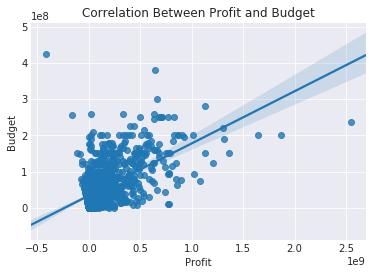

In [129]:
#calculating and printing the correlation value between profit and budget.
print("correlation = ", df.corr().loc["profit", "budget"])

#visualizing a regression model between profit and budget.
x = df["profit"]
y = df["budget"]
ax = sns.regplot(x, y)
ax.set_title("Correlation Between Profit and Budget") 
ax.set_xlabel("Profit") 
ax.set_ylabel("Budget") 
sns.set_style("darkgrid")


Here, I used seaborn to show a regression plot between profit and budget. The correlation is positive, so an increase in budget should see an increase in profit as well.

### Question 4:
What genre has the highest count?

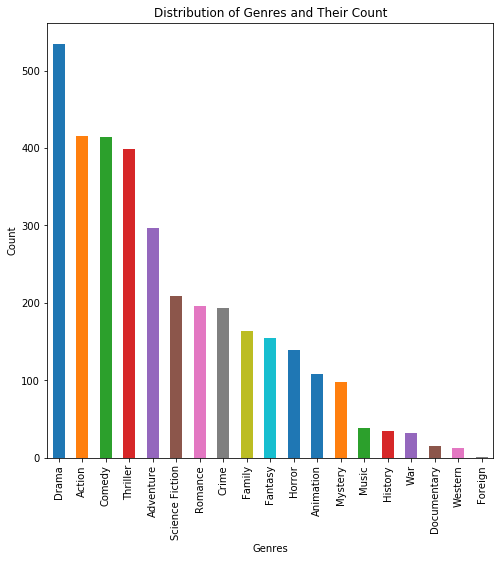

In [7]:
#Concat all genres into a single column
genre = df["genres"].str.cat(sep="|")
#Make it into a Series and split it.
genre_split = pd.Series(genre.split("|"))
#Find the count of the different genres
genre_count = genre_split.value_counts()


#Plot a bar graph to view the distribution of the genres
plt.figure(figsize=(8,8))
plt.title("Distribution of Genres and Their Count")
plt.xlabel("Genres")
plt.ylabel("Count")
genre_count.plot.bar();


From this bar graph, we can see the distribution of the genres in this dataset with "Drama" leading the count.

<a id='conclusions'></a>
## Conclusion

In summation, analysing this dataset has helped me find the answers to the questions I posed while starting out. I have found out that;


a) 'Avatar' made the most money in returns while 'The Warrior's Way' made the least.

b) The year 1977 was a big year for movie, seeing as the most profit was made.

c) The correlation between profit and budget is positive so this should mean the higher the budget, the higher the profit made.

d) Drama has the highest genre count in the dataset followed by Action and Comedy.

   #### Limitations
a) Null values: There were a lot of null values in this dataset which led to these rows being dropped. This, in turn, affected the output of my analysis, largely, especially when it came to finding out the most profit made per year.

b) Outliers: There were a couple of outliers as seen in my correlation plot. A positive correlation means that as one variable increases, the second does as well. However, though having the highest budget, "The Warrior's Way" made the least in profit. This is one example out of other outliers in the plot.

b) Column separation: The genre column has a separator(|) and this posed a problem as I spent time computing different ways to clean the data to get the output I want. This should be resolved to limit amount of time spent on data wrangling.

In [128]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

Reference: 
https://seaborn.pydata.org/generated/seaborn.regplot.html
www.geeksforgeeks.org
